# Problem Statement

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

Dataset - https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

# Importing Base Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from statistics import mode

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Importing Dataset

In [2]:
df = pd.read_csv('Telecom_customer_churn.csv')
df.head() #first 5 rows of data set

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploring Data set

In [3]:
df.shape

(7043, 21)

Observation - There are 21 different analysis factors in this dataset and it contains 7043 entries in total

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Observation - We can see 'Churn' is our Target column in this datadset which has 'Yes or No' values we have to predict if the customer will leave the company or not, hence it is a binary classification problem.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observation - SeniorCitizen, tenure, MonthlyCharges are of numerical data type, while all other fields are of Categorical type. TotalCharges should also be of numerical data type, need to convert it.
- There is no null value in the data set

Description -
- customerId - customer ID
- gender - gender of the customer
- SeniorCitizen - is the customer senior citizen
- Partner - is the customer partner
- Dependents - is he having any dependents
- tenure - since how customer is taking the services
- PhoneService - the service he is taking
- MultipleLines - is multiple lines attached
- InternetService - is he taking internet service
- OnlineSecurity - he is taking online security
- 10 OnlineBackup - which type of online backup service he is taking
- DeviceProtection -  is he taking device protection
- TechSupport - is he taking tech support
- StreamingTV - is he taking streaming Tv service
- StreamingMovies - is he taking streaming movie service
- Contract - what is his contract period
- PaperlessBilling - is he taking paperless billing servive
- PaymentMethod - mode of payment
- MonthlyCharges - monthly charges
- TotalCharges - total charges

# Dropping unecessary column - Customer ID

CustomerId is a unique id provided to the customer and it will not help in analysing feature and target relationship, hence we can drop that column

In [6]:
df = df.drop(['customerID'], axis = 1)

In [7]:
df.shape

(7043, 20)

# Null Value Analysis

This analysis is to figure out if data contains any undefined or null value

In [8]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Observation - There is no missing value in this dataset

# Checking for spaces " " in TotalCharges Column

while analysing the data set it can be seen that the totalCharges column contain some values filled with spaces. Lets find out those columns and replace them with median

In [9]:
# Checking the space in TotalCharges column
df.loc[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan) #replacing " " with nan
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median()) #replacing nan with median
df.loc[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Observation - " " values have been processed with valid data

# Converting the datatype of TotalCharges Column from Object to Numerical

In [11]:
# Converting object datatype to float datatype
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

# Drop Duplicate Data

In [12]:
#lets drop the duplicate rows if any
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


Observation - There are total 7021 entries now, after removing duplicate entries

# Discriptive Analysis

In [13]:
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7021,7021.000000,7021,7021,7021.000000,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021.000000,7021.000000,7021
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3541,NaN,3619,4911,NaN,6339,3368,3090,3490,3080,3087,3465,2802,2777,3853,4161,2359,NaN,NaN,5164
mean,NaN,0.162512,NaN,NaN,32.469449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.851894,2288.954490,NaN
std,NaN,0.368947,NaN,NaN,24.534965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.069001,2265.319449,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.750000,411.150000,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.400000,1400.550000,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.900000,3801.700000,NaN


Observation - 
- Gender - 3541 out of 7021 customers are male, there are 2 unique values
- SeniorCitizen - There are two unique value 0 & 1, 0 means the person is not a senior citizen while 1 means person is a senior citizen
- partner - there are 2 unique value Yes/No, max 3619 customer are not having any partner
- Dependents - 4911 customers are not having any dependent
- tenure - min tenure = 0 , max tenure = 72, 50% of customer are having tenure below 29
- PhoneService - 6339 customer are using phone service
- MultipleLines - 3368 customer are not using multiple lines
- Internet Services - 3090 customers are using Fiber Optic internet services
- OnlineSecurity - 3490 customers are not using online security
- OnlineBackup - 3080 customers are not using online backup
- DeviceProtection - 3087 customers are not using device protection
- techSupport - 3465 customers are not using Technical Support
- StreamingTV - 2802 people are not streaming TV
- StreamingMovies - 2777 customers are not streaming Movies
- contract - 3853 customers are having month-to-month contract 
- PaperlessBilling - 4161 customers are doing paperless billing
- PaymentMethod - 2359 customers are using Electronic check payment method
- Monthly charges - min charges are 18rs and max charges are 118rs, 50% of customers are paying charges below 70rs
- Total charges - min are 18rs, max are 8684 rs, 50% of customers are paying below 1400 rs
- Churn - 5164 customers are retained with the company

# Interpreting Relationship between Features and Target Variable

In [14]:
#separating the Features and Target Variable
x = df.drop(columns = ['Churn'])
y = df['Churn']

In [15]:
x.shape

(7021, 19)

# Analysing Target Variable

In [16]:
y.unique()

array(['No', 'Yes'], dtype=object)

In [17]:
y.nunique()

2

In [18]:
y.value_counts()

No     5164
Yes    1857
Name: Churn, dtype: int64

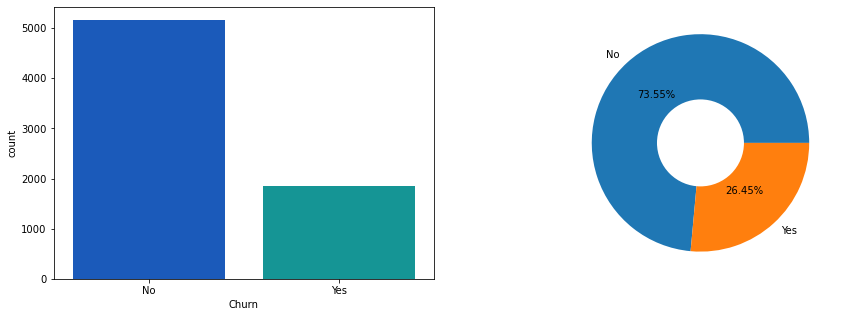

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(y, palette ='winter')

plt.subplot(1,2,2)
labels = 'No','Yes'
plt.pie(y.value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 73.55% of the customers are retained with the company

# Analysing Feature Variables

1) gender

In [21]:
x['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [22]:
x['gender'].nunique()

2

In [23]:
x['gender'].value_counts()

Male      3541
Female    3480
Name: gender, dtype: int64

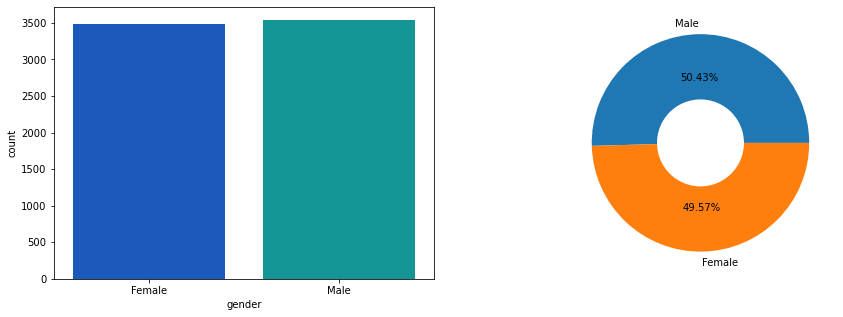

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x['gender'], palette ='winter')

plt.subplot(1,2,2)
labels = 'Male','Female'
plt.pie(x['gender'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - There are almost equal no. of male and female in the data set, 50.43% customer are male

2) SeniorCitizen

In [25]:
x['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [26]:
x['SeniorCitizen'].nunique()

2

In [27]:
x['SeniorCitizen'].value_counts()

0    5880
1    1141
Name: SeniorCitizen, dtype: int64

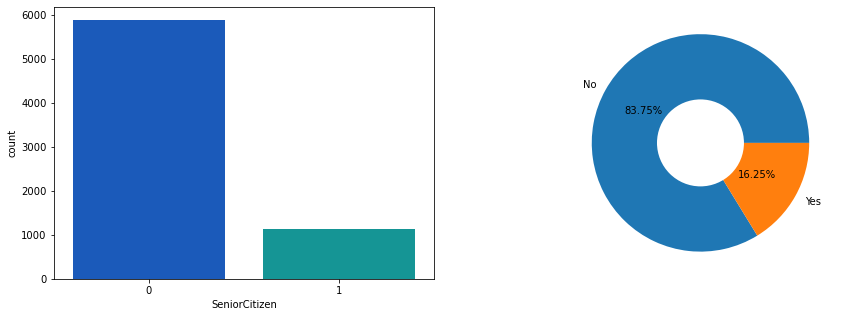

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x['SeniorCitizen'], palette ='winter')

plt.subplot(1,2,2)
labels = 'No','Yes'
plt.pie(x['SeniorCitizen'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - Most of the customers 83.75% are not senior citizen

3) Partner

In [29]:
x['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [30]:
x['Partner'].nunique()

2

In [31]:
x['Partner'].value_counts()

No     3619
Yes    3402
Name: Partner, dtype: int64

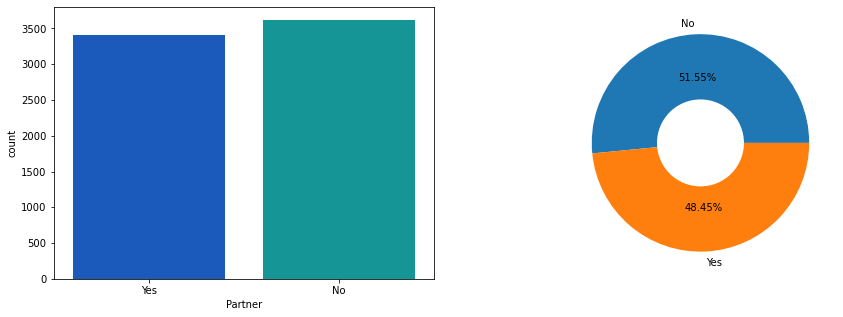

In [34]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x['Partner'], palette ='winter')

plt.subplot(1,2,2)
labels = 'No','Yes'
plt.pie(x['Partner'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 51.55% of people don't have any partner

4) Dependents

In [35]:
x['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [36]:
x['Dependents'].nunique()

2

In [37]:
x['Dependents'].value_counts()

No     4911
Yes    2110
Name: Dependents, dtype: int64

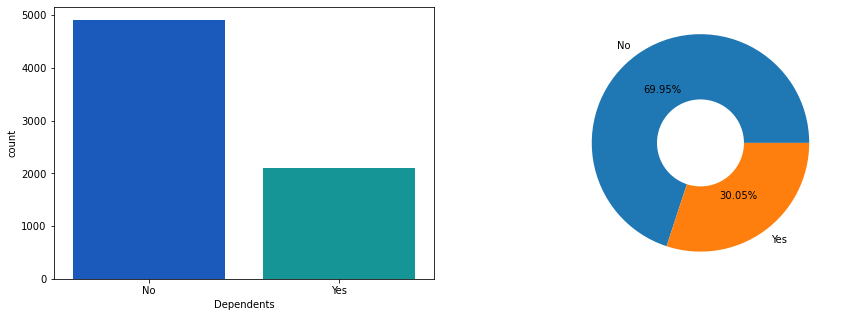

In [39]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x['Dependents'], palette ='winter')

plt.subplot(1,2,2)
labels = 'No','Yes'
plt.pie(x['Dependents'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 69.95% customers don't have any dependents

5) tenure

In [42]:
x['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [41]:
x['tenure'].nunique()

73

In [43]:
x['tenure'].value_counts()

1     591
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

<AxesSubplot:xlabel='tenure', ylabel='count'>

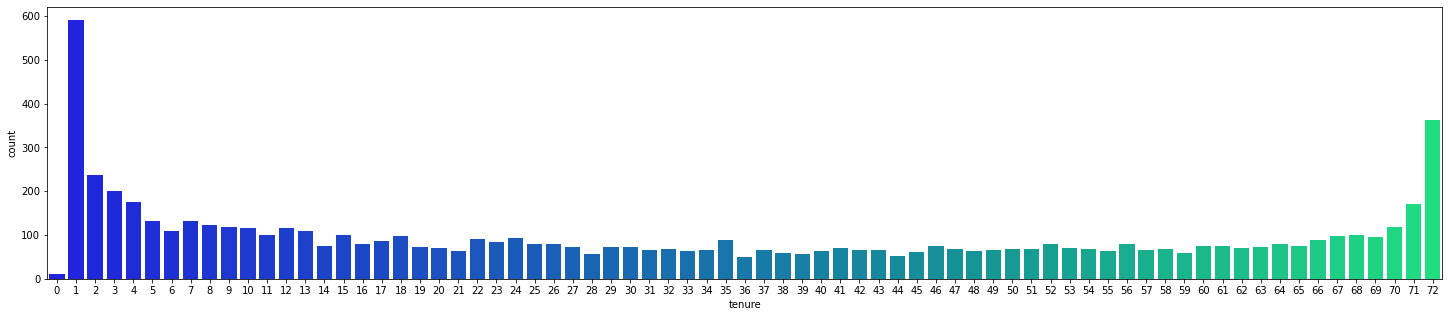

In [46]:
plt.figure(figsize=(25,5))

sns.countplot(x['tenure'], palette ='winter')


6) PhoneService

In [47]:
x['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [48]:
x['PhoneService'].nunique()

2

In [49]:
x['PhoneService'].value_counts()

Yes    6339
No      682
Name: PhoneService, dtype: int64

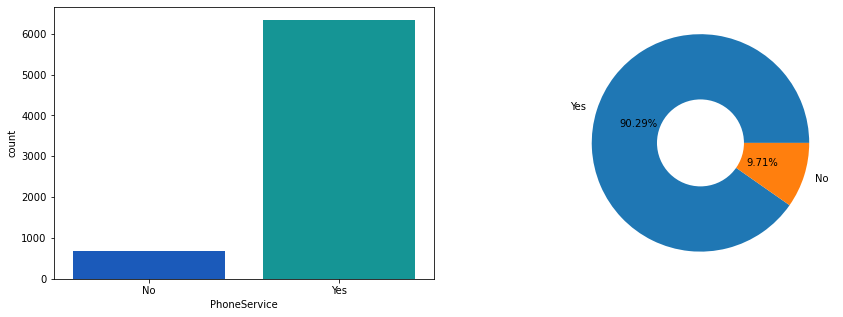

In [51]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x['PhoneService'], palette ='winter')

plt.subplot(1,2,2)
labels = 'Yes','No'
plt.pie(x['PhoneService'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 90.29% of customers are using phone service

7) MultipleLines

In [52]:
x['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

OBservation - customer having no phone service don't have multiple lines so can update value 'No phone service' as 'No' here

In [68]:
df.loc[df["MultipleLines"] == "No phone service", "MultipleLines"] = 'No'
x.loc[x["MultipleLines"] == "No phone service", "MultipleLines"] = 'No'

In [69]:
x['MultipleLines'].nunique()

2

In [70]:
x['MultipleLines'].value_counts()

No     4050
Yes    2971
Name: MultipleLines, dtype: int64

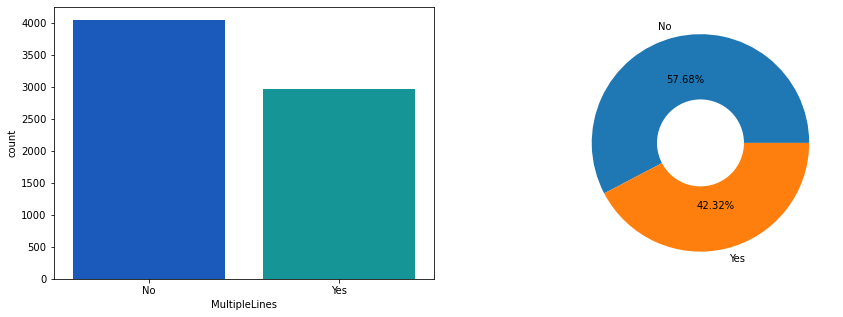

In [71]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x['MultipleLines'], palette ='winter')

plt.subplot(1,2,2)
labels = 'No','Yes'
plt.pie(x['MultipleLines'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 57.68% of customers are using no multiple lines, while 42.32% of customers are using multiple lines

8) InternetService

In [57]:
x['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [58]:
x['InternetService'].nunique()

3

In [59]:
x['InternetService'].value_counts()

Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64

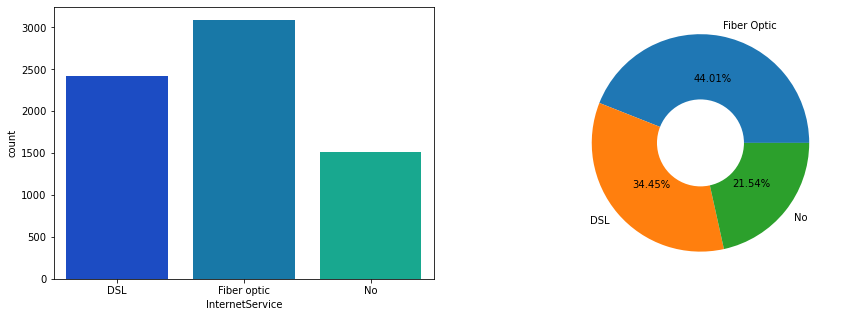

In [60]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x['InternetService'], palette ='winter')

plt.subplot(1,2,2)
labels = 'Fiber Optic','DSL','No'
plt.pie(x['InternetService'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 44% of people are using Fiber optic internet service, 34.45% are using DSL while 21% are using No internet service

9) OnlineSecurity 

In [61]:
x['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

Observation - customer using no Internet service are not using any online sercurity feature, hence we can update 'No internet service' as 'No'

In [72]:
df.loc[df["OnlineSecurity"] == "No internet service", "OnlineSecurity"] = 'No'
x.loc[x["OnlineSecurity"] == "No internet service", "OnlineSecurity"] = 'No'

In [73]:
x['OnlineSecurity'].nunique()

2

In [74]:
x['OnlineSecurity'].value_counts()

No     5002
Yes    2019
Name: OnlineSecurity, dtype: int64

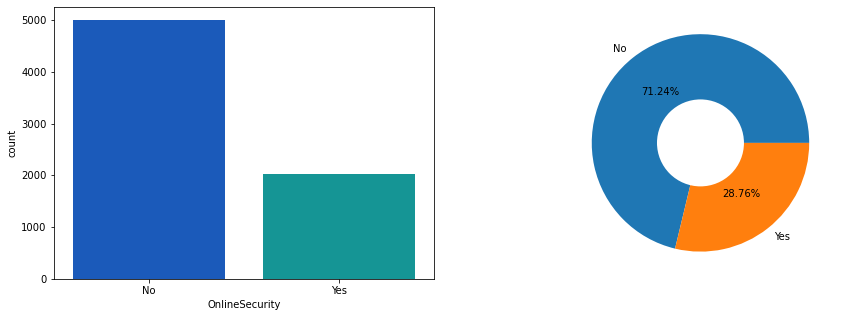

In [75]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x['OnlineSecurity'], palette ='winter')

plt.subplot(1,2,2)
labels = 'No','Yes'
plt.pie(x['OnlineSecurity'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 71%% of people are not using online security while 28% are using it.

10) OnlineBackup

In [65]:
x['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

Observation - customer using no Internet service are not using any online backup feature, hence we can update 'No internet service' as 'No'

In [76]:
df.loc[df["OnlineBackup"] == "No internet service", "OnlineBackup"] = 'No'
x.loc[x["OnlineBackup"] == "No internet service", "OnlineBackup"] = 'No'

In [77]:
x['OnlineBackup'].nunique()

2

In [78]:
x['OnlineBackup'].value_counts()

No     4592
Yes    2429
Name: OnlineBackup, dtype: int64

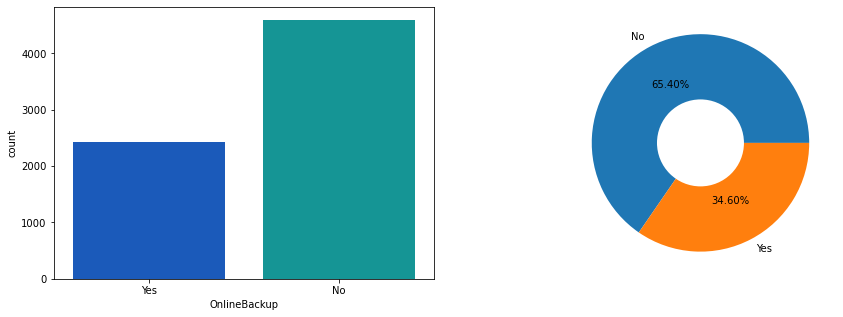

In [79]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x['OnlineBackup'], palette ='winter')

plt.subplot(1,2,2)
labels = 'No','Yes'
plt.pie(x['OnlineBackup'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 65% of customers are not using online backup service

11) DeviceProtection

In [81]:
x['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

Observation - customer using no Internet service are not using any DeviceProtection feature, hence we can update 'No internet service' as 'No'

In [83]:
df.loc[df["DeviceProtection"] == "No internet service", "DeviceProtection"] = 'No'
x.loc[x["DeviceProtection"] == "No internet service", "DeviceProtection"] = 'No'

In [84]:
x['DeviceProtection'].nunique()

2

In [85]:
x['DeviceProtection'].value_counts()

No     4599
Yes    2422
Name: DeviceProtection, dtype: int64

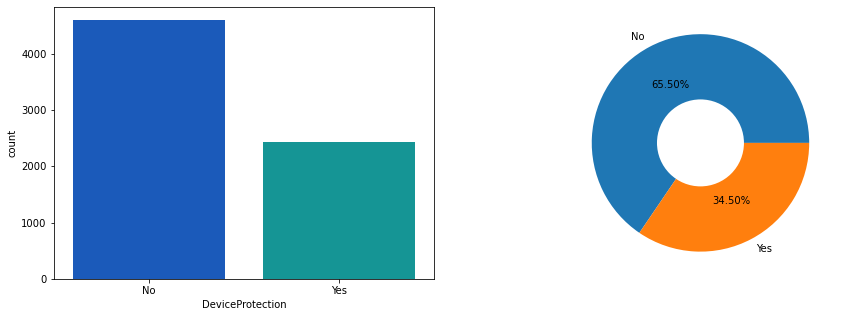

In [86]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x['DeviceProtection'], palette ='winter')

plt.subplot(1,2,2)
labels = 'No','Yes'
plt.pie(x['DeviceProtection'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 65.50% of customers are not using deviceprotection while 34.50% of customers are using it

12) TechSupport

In [87]:
x['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

Observation - customer using no Internet service are not using any Tech Support feature, hence we can update 'No internet service' as 'No'

In [89]:
df.loc[df["TechSupport"] == "No internet service", "TechSupport"] = 'No'
x.loc[x["TechSupport"] == "No internet service", "TechSupport"] = 'No'

In [90]:
x['TechSupport'].nunique()

2

In [91]:
x['TechSupport'].value_counts()

No     4977
Yes    2044
Name: TechSupport, dtype: int64

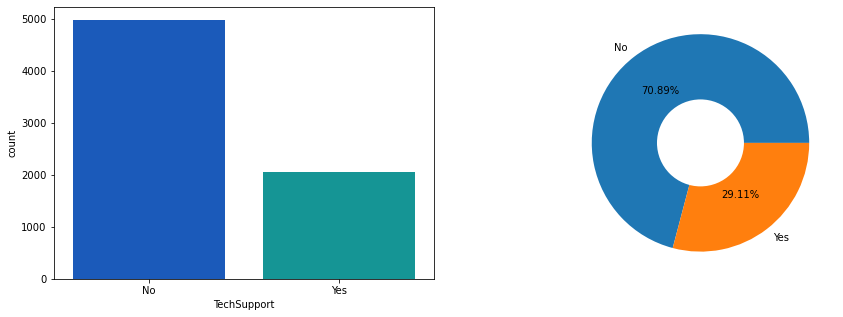

In [92]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x['TechSupport'], palette ='winter')

plt.subplot(1,2,2)
labels = 'No','Yes'
plt.pie(x['TechSupport'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 70.89% customers are not using any tech support while 29.11% are using it

13) StreamingTV

In [93]:
x['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

Observation - customer using no Internet service are not using any StreamingTV feature, hence we can update 'No internet service' as 'No'

In [94]:
df.loc[df["StreamingTV"] == "No internet service", "StreamingTV"] = 'No'
x.loc[x["StreamingTV"] == "No internet service", "StreamingTV"] = 'No'

In [95]:
x['StreamingTV'].nunique()

2

In [96]:
x['StreamingTV'].value_counts()

No     4314
Yes    2707
Name: StreamingTV, dtype: int64

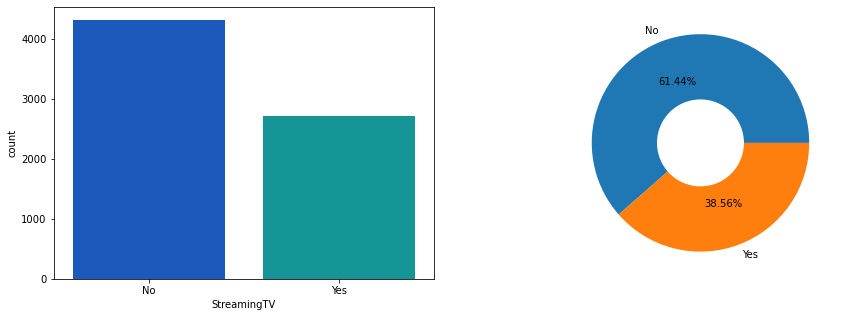

In [97]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x['StreamingTV'], palette ='winter')

plt.subplot(1,2,2)
labels = 'No','Yes'
plt.pie(x['StreamingTV'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 61.44% of customer are streaming TV, while 38.56% are not 

14) StreamingMovies

In [98]:
x['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

Observation - customer using no Internet service are not using any StreamingMovies feature, hence we can update 'No internet service' as 'No'

In [99]:
df.loc[df["StreamingMovies"] == "No internet service", "StreamingMovies"] = 'No'
x.loc[x["StreamingMovies"] == "No internet service", "StreamingMovies"] = 'No'

In [100]:
x['StreamingMovies'].nunique()

2

In [102]:
x['StreamingMovies'].value_counts()

No     4289
Yes    2732
Name: StreamingMovies, dtype: int64

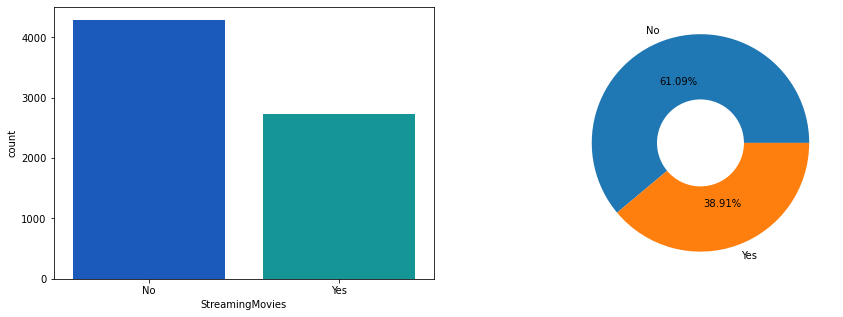

In [104]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x['StreamingMovies'], palette ='winter')

plt.subplot(1,2,2)
labels = 'No','Yes'
plt.pie(x['StreamingMovies'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 61.09% of customers are streaming Movies while 38.91% are not

15) Contract

In [105]:
x['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [106]:
x['Contract'].nunique()

3

In [107]:
x['Contract'].value_counts()

Month-to-month    3853
Two year          1695
One year          1473
Name: Contract, dtype: int64

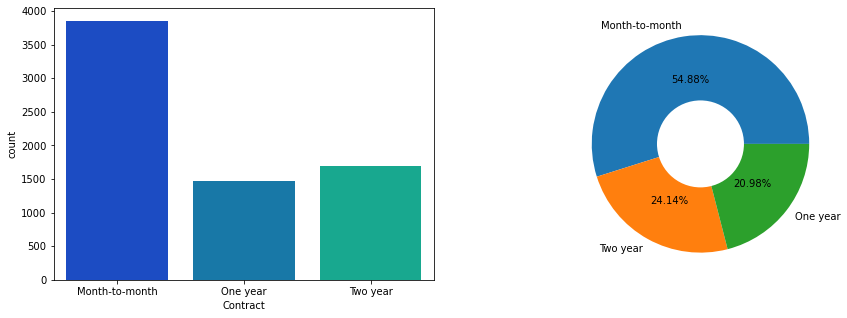

In [108]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x['Contract'], palette ='winter')

plt.subplot(1,2,2)
labels = 'Month-to-month','Two year','One year'
plt.pie(x['Contract'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 54.88% customers are having month-to-month contract, 24.14% are having two year contract while 20.98% are having one year contract

16) PaperlessBilling

In [109]:
x['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [110]:
x['PaperlessBilling'].nunique()

2

In [111]:
x['PaperlessBilling'].value_counts()

Yes    4161
No     2860
Name: PaperlessBilling, dtype: int64

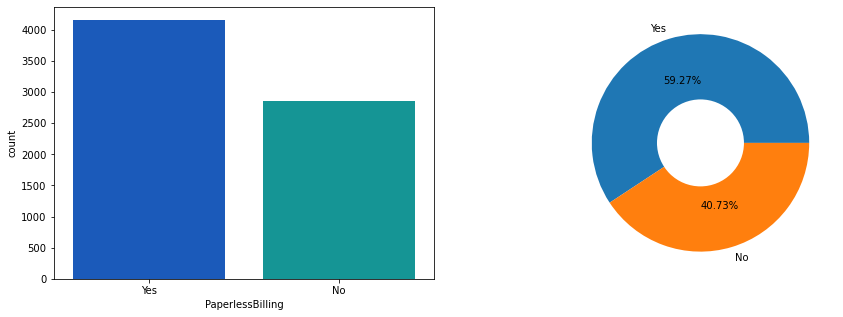

In [112]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x['PaperlessBilling'], palette ='winter')

plt.subplot(1,2,2)
labels = 'Yes','No'
plt.pie(x['PaperlessBilling'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 59.27% of customers have opted for paperless billing

17) PaymentMethod

In [113]:
x['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [114]:
x['PaymentMethod'].nunique()

4

In [115]:
x['PaymentMethod'].value_counts()

Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

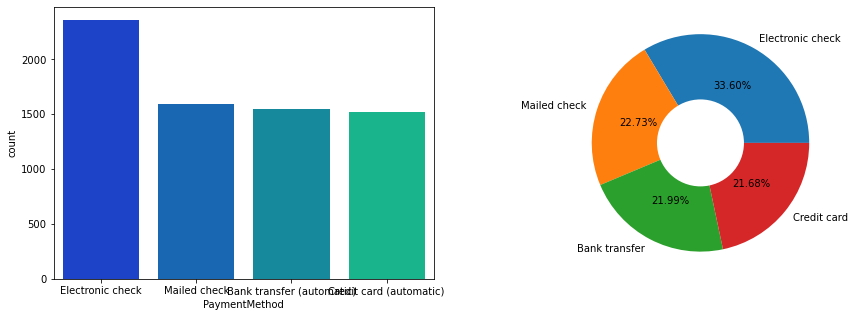

In [116]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x['PaymentMethod'], palette ='winter')

plt.subplot(1,2,2)
labels = 'Electronic check','Mailed check','Bank transfer','Credit card'
plt.pie(x['PaymentMethod'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%')
#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Observation - 33.60% of customer prefer Electronic cheque, 22.73% prefer mailed cheque, 21.99% prefer bank transfer and 21.68% prefer credit card trf

# Analysing variation of Target wrt Feature Variables

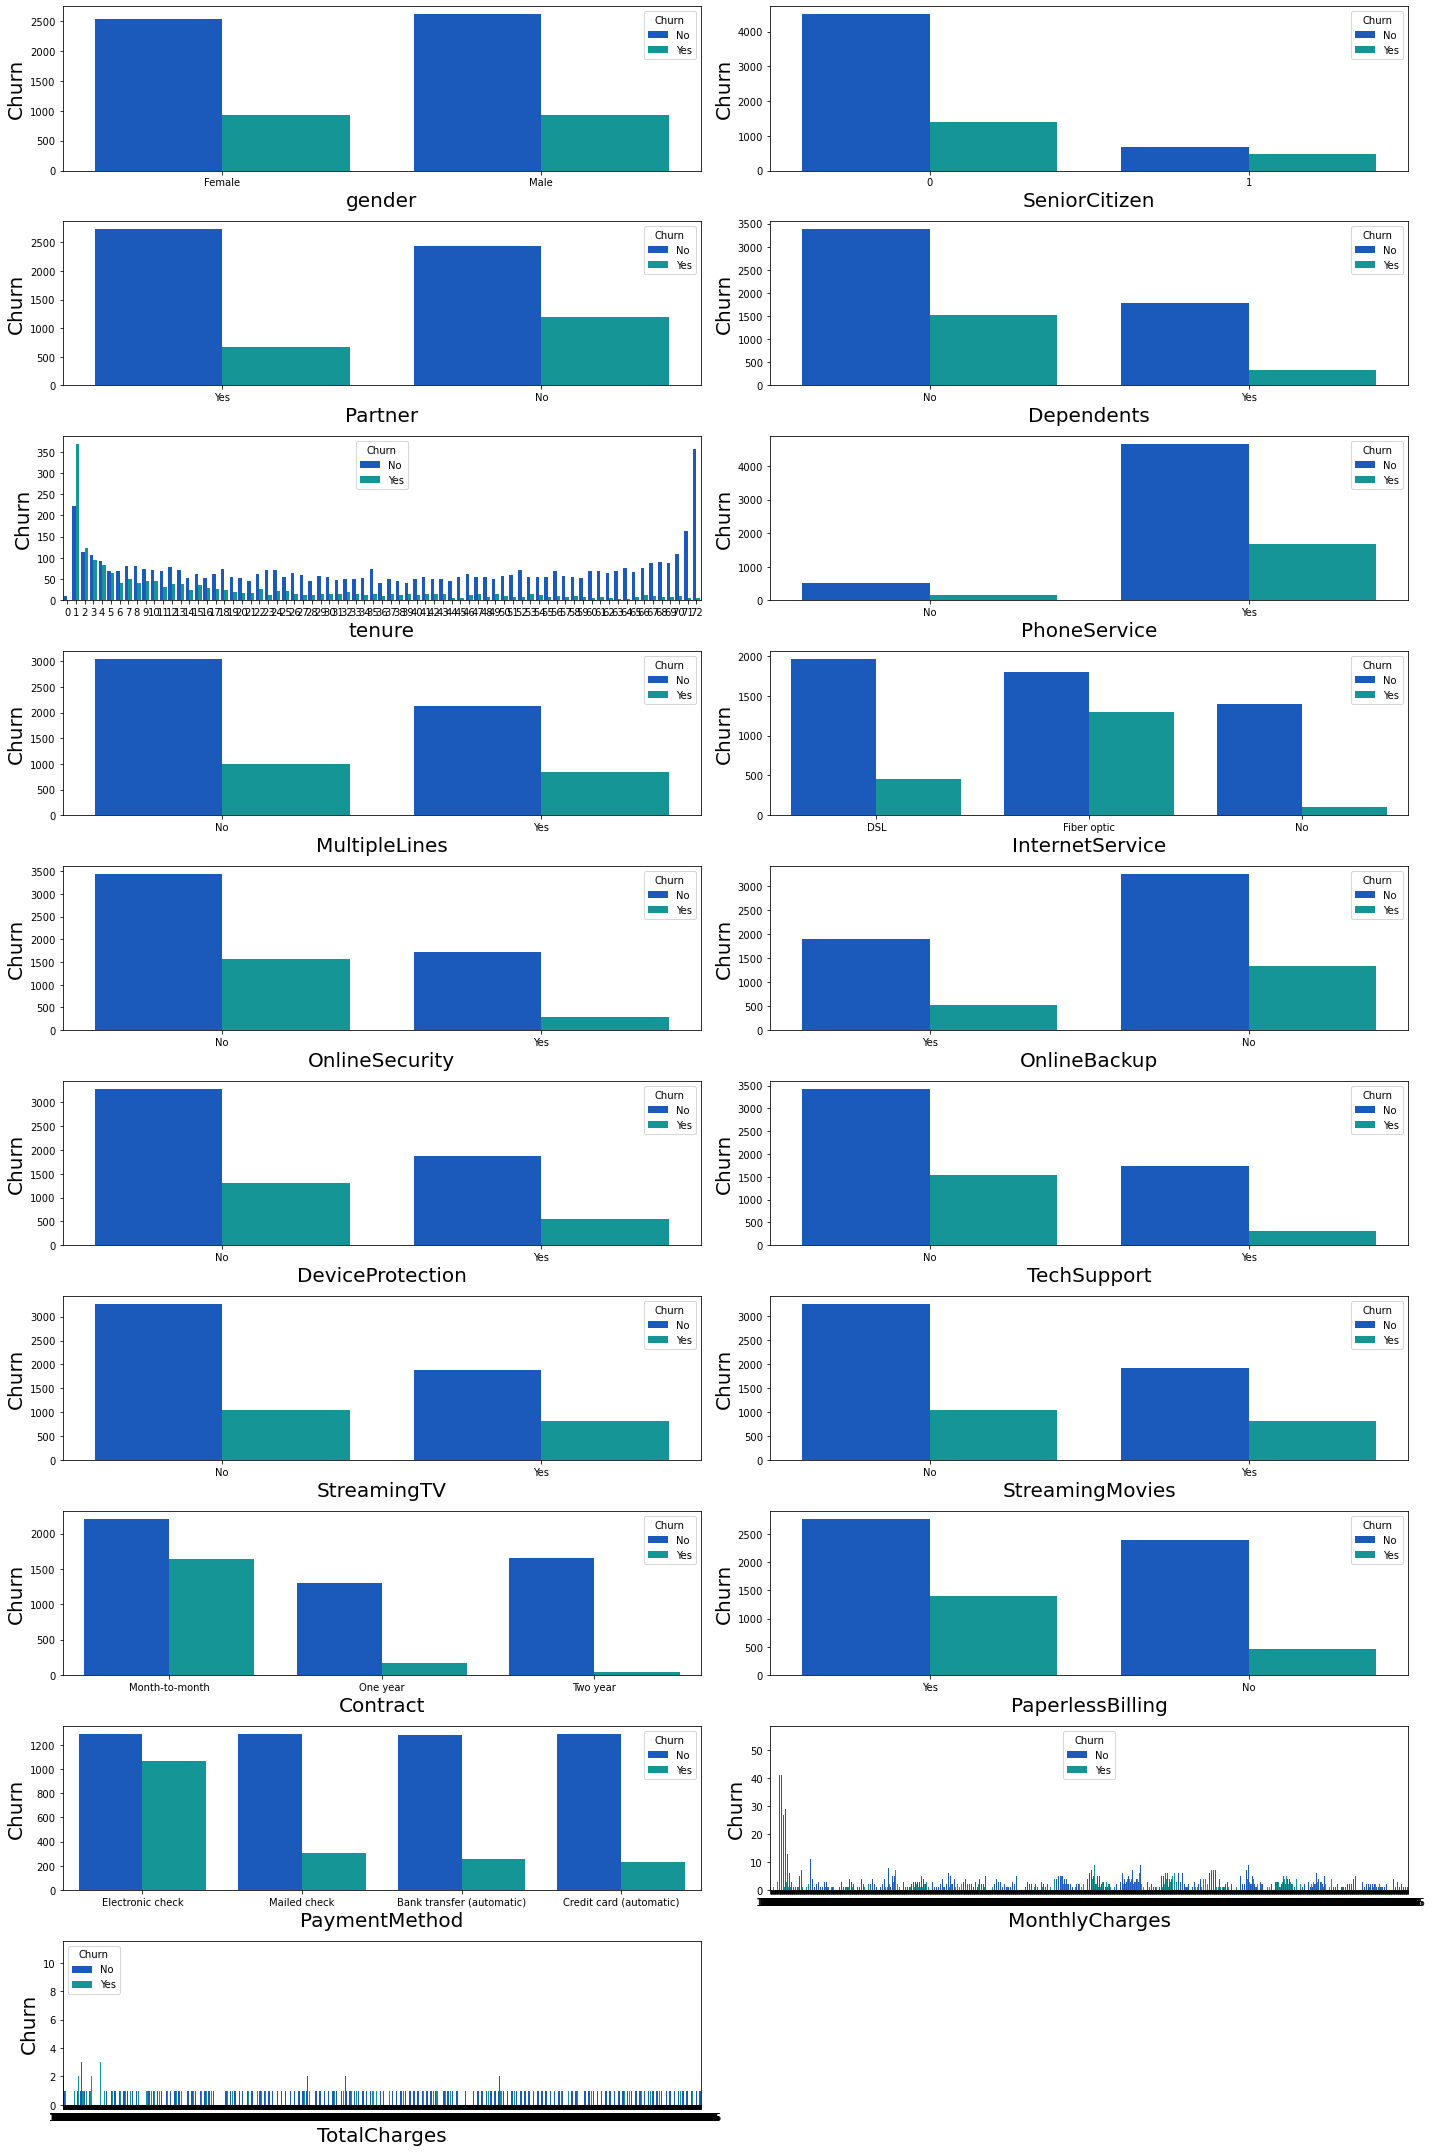

In [124]:
plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
for col in x:
    if plotnum<=20:
        plt.subplot(10,2,plotnum)
        sns.countplot(x = col, hue= df['Churn'], data = x, palette="winter")
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Churn',fontsize=20)
    plotnum+=1
plt.tight_layout()

# Visualizing all data together

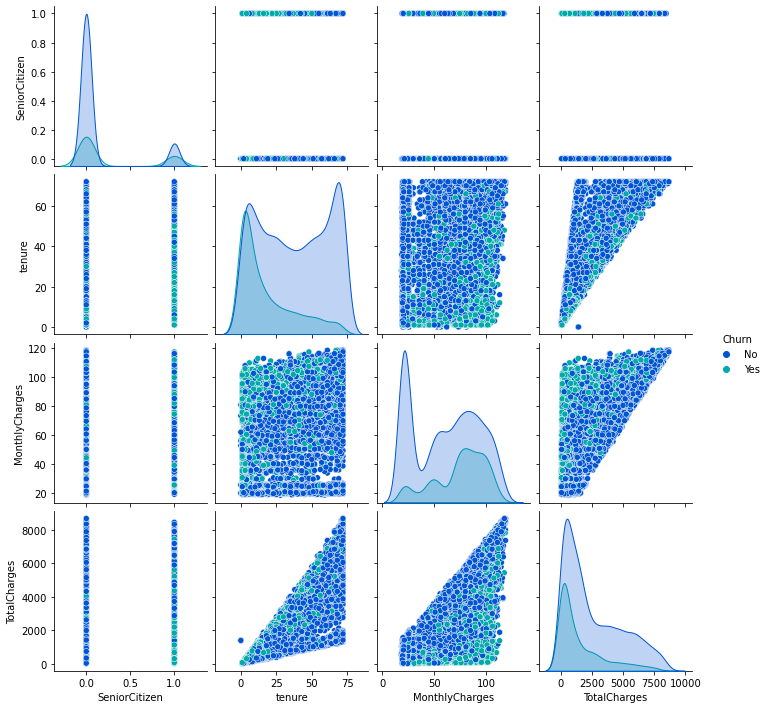

In [130]:
sns.pairplot(df, palette = 'winter', hue='Churn')

# Label Encoding

In [133]:
#we need to convert categorical columns into numerical ones before proceeding further
label_encoder = preprocessing.LabelEncoder()

#encoding feature columns
df['gender']=label_encoder.fit_transform(df['gender'])

df['Partner']=label_encoder.fit_transform(df['Partner'])

df['Dependents']=label_encoder.fit_transform(df['Dependents'])

df['PhoneService']=label_encoder.fit_transform(df['PhoneService'])

df['MultipleLines']=label_encoder.fit_transform(df['MultipleLines'])

df['InternetService']=label_encoder.fit_transform(df['InternetService'])

df['OnlineSecurity']=label_encoder.fit_transform(df['OnlineSecurity'])

df['OnlineBackup']=label_encoder.fit_transform(df['OnlineBackup'])

df['DeviceProtection']=label_encoder.fit_transform(df['DeviceProtection'])

df['TechSupport']=label_encoder.fit_transform(df['TechSupport'])

df['StreamingTV']=label_encoder.fit_transform(df['StreamingTV'])

df['StreamingMovies']=label_encoder.fit_transform(df['StreamingMovies'])

df['Contract']=label_encoder.fit_transform(df['Contract'])

df['PaperlessBilling']=label_encoder.fit_transform(df['PaperlessBilling'])

df['PaymentMethod']=label_encoder.fit_transform(df['PaymentMethod'])

df['PaperlessBilling']=label_encoder.fit_transform(df['PaperlessBilling'])

#encoding target columns
df['Churn']=label_encoder.fit_transform(df['Churn'])

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   int32  
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   int32  
 3   Dependents        7021 non-null   int32  
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   int32  
 6   MultipleLines     7021 non-null   int32  
 7   InternetService   7021 non-null   int32  
 8   OnlineSecurity    7021 non-null   int32  
 9   OnlineBackup      7021 non-null   int32  
 10  DeviceProtection  7021 non-null   int32  
 11  TechSupport       7021 non-null   int32  
 12  StreamingTV       7021 non-null   int32  
 13  StreamingMovies   7021 non-null   int32  
 14  Contract          7021 non-null   int32  
 15  PaperlessBilling  7021 non-null   int64  
 16  PaymentMethod     7021 non-null   int32  


# Correlation

In [135]:
#lets find out the correlation between the columns
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001125,-0.001014,0.011081,0.006185,-0.006769,-0.007730,-0.001762,-0.016534,-0.013206,-0.001511,-0.008703,-0.007760,-0.009856,0.000811,-0.011350,0.016304,-0.013158,0.000827,-0.008763
SeniorCitizen,-0.001125,1.000000,0.015553,-0.212115,0.015349,0.008909,0.142357,-0.031221,-0.039332,0.065950,0.058797,-0.061338,0.104765,0.119584,-0.143624,0.156196,-0.037320,0.219434,0.101886,0.151619
Partner,-0.001014,0.015553,1.000000,0.451659,0.377346,0.018728,0.139834,0.003667,0.141482,0.139620,0.151941,0.118311,0.122572,0.115284,0.293042,-0.015776,-0.152069,0.094301,0.316311,-0.149135
Dependents,0.011081,-0.212115,0.451659,1.000000,0.157603,-0.001092,-0.026324,0.046608,0.079776,0.022217,0.012498,0.062039,-0.018207,-0.041441,0.241912,-0.112220,-0.038185,-0.116191,0.061698,-0.163459
tenure,0.006185,0.015349,0.377346,0.157603,1.000000,0.009786,0.329742,-0.026847,0.325704,0.358586,0.358968,0.322694,0.277575,0.283932,0.670728,0.005053,-0.367827,0.245251,0.824875,-0.351508
PhoneService,-0.006769,0.008909,0.018728,-0.001092,0.009786,1.000000,0.280935,0.387549,-0.092316,-0.051619,-0.070554,-0.095761,-0.021788,-0.032179,0.003101,0.016824,-0.005304,0.248984,0.114225,0.011323
MultipleLines,-0.007730,0.142357,0.139834,-0.026324,0.329742,0.280935,1.000000,0.013614,0.096583,0.200690,0.199591,0.099037,0.255579,0.257170,0.105130,0.163249,-0.168684,0.489539,0.467306,0.041958
InternetService,-0.001762,-0.031221,0.003667,0.046608,-0.026847,0.387549,0.013614,1.000000,-0.392445,-0.313719,-0.305763,-0.388791,-0.241122,-0.248948,0.102456,-0.137056,0.082669,-0.320525,-0.173443,-0.047366
OnlineSecurity,-0.016534,-0.039332,0.141482,0.079776,0.325704,-0.092316,0.096583,-0.392445,1.000000,0.282802,0.274398,0.354110,0.174919,0.186119,0.244301,-0.004202,-0.148360,0.295548,0.411014,-0.170520
OnlineBackup,-0.013206,0.065950,0.139620,0.022217,0.358586,-0.051619,0.200690,-0.313719,0.282802,1.000000,0.302398,0.293209,0.280816,0.273188,0.153493,0.126421,-0.168938,0.440965,0.508555,-0.081092


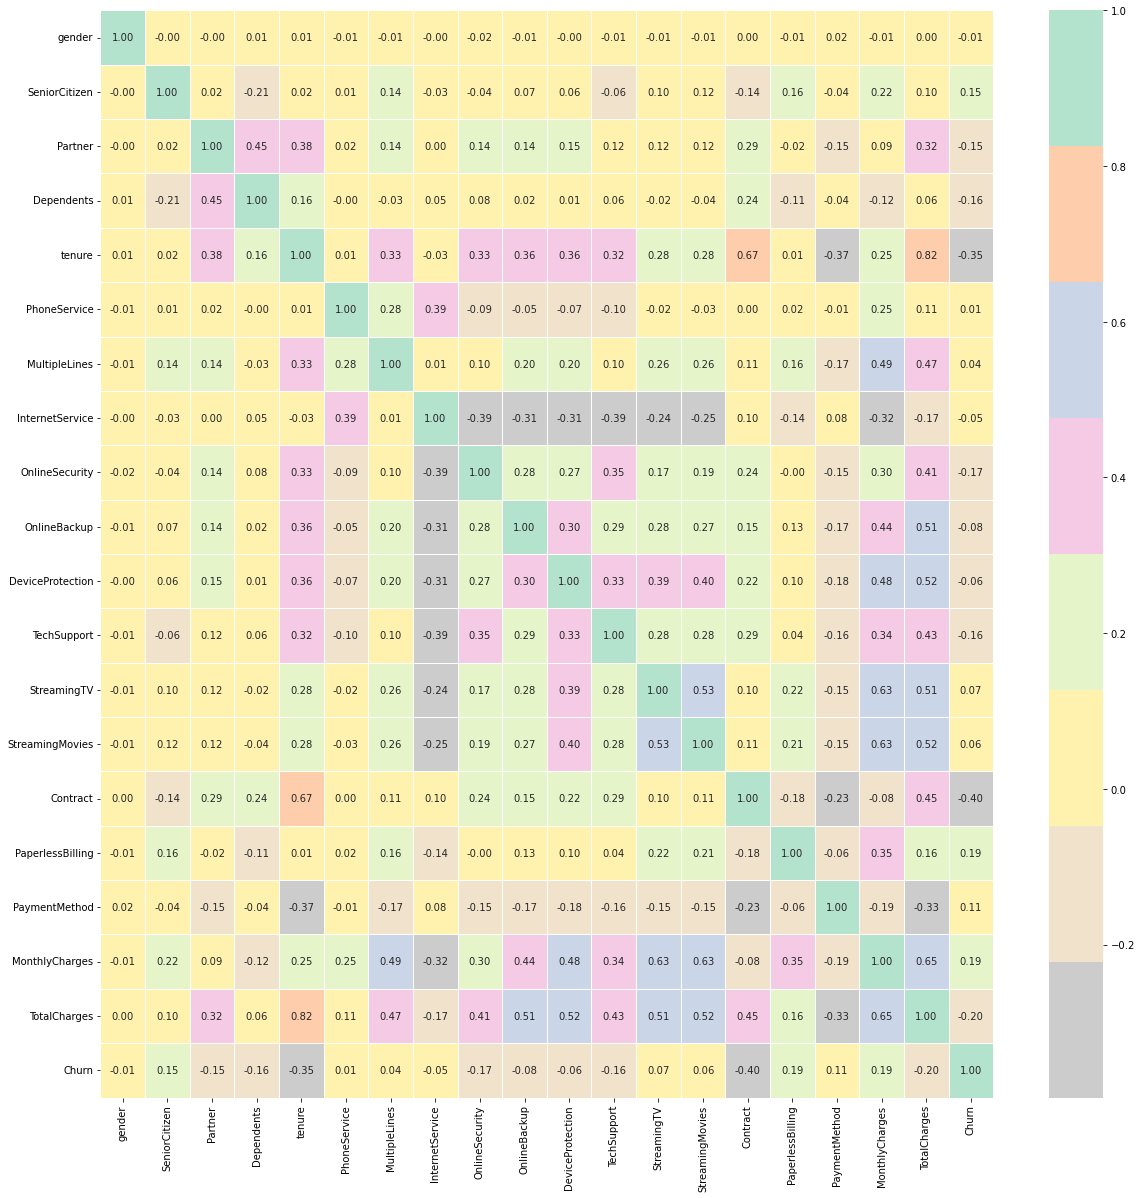

In [136]:
#lets plot the correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=1,cmap='Pastel2_r')
plt.show()

Observation - 
- Some of the feature variable are hghly correlated, highest correaltion found is 82% between tenure and total charges
- contract and tenure are also serving strong bond 67% 
- Overall we need to test VIF score to test multicollinearity issue as many of the feature variables are serving good bond.

In [137]:
#lets find out the correlation of Feature variables with target variable 
df.corr()['Churn'].sort_values()

Contract           -0.396531
tenure             -0.351508
TotalCharges       -0.197911
OnlineSecurity     -0.170520
TechSupport        -0.163937
Dependents         -0.163459
Partner            -0.149135
OnlineBackup       -0.081092
DeviceProtection   -0.064944
InternetService    -0.047366
gender             -0.008763
PhoneService        0.011323
MultipleLines       0.041958
StreamingMovies     0.063192
StreamingTV         0.065032
PaymentMethod       0.106238
SeniorCitizen       0.151619
PaperlessBilling    0.190891
MonthlyCharges      0.194508
Churn               1.000000
Name: Churn, dtype: float64

Observation - 
- contract , tenure are serving good bond wrt the target variable, 39.6% and 35% respectively
- totalcharges, online security, techsupport, depenedants are also good bond
- rest of the features are serving weak bond wrt the target variable

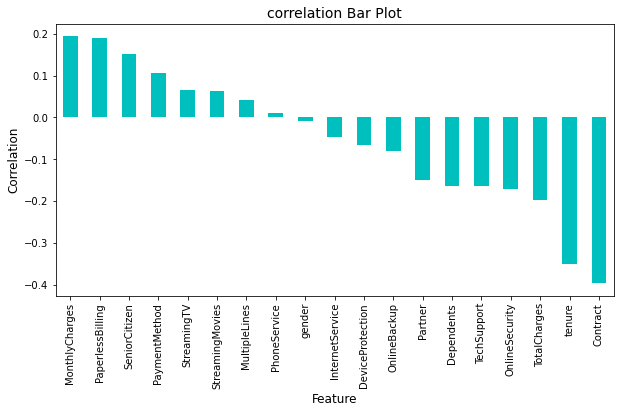

In [138]:
#Plotting the correlation
plt.figure(figsize=(10,5))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar' ,color='c')
plt.xlabel('Feature' ,fontsize=12)
plt.ylabel('Correlation',fontsize=12)
plt.title('correlation Bar Plot',fontsize=14)
plt.show()

# Detecting Multicollinearity with VIF and Data Cleaning

Observed using heatmap that some of the feature variable have good correaltion which causes multicollinearity. lets test that using VIF score

In [139]:
#separating the Features and Target Variable
x = df.drop(columns = ['Churn'])
y = df['Churn']

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()

vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

             feature        VIF
0             gender   1.953443
1      SeniorCitizen   1.370448
2            Partner   2.820532
3         Dependents   1.962438
4             tenure  14.421183
5       PhoneService  15.885918
6      MultipleLines   2.610299
7    InternetService   4.419211
8     OnlineSecurity   2.063398
9       OnlineBackup   2.302264
10  DeviceProtection   2.420363
11       TechSupport   2.145591
12       StreamingTV   3.152029
13   StreamingMovies   3.179586
14          Contract   4.162917
15  PaperlessBilling   2.875696
16     PaymentMethod   3.053958
17    MonthlyCharges  28.891577
18      TotalCharges  14.780917


VIF values ranging between 1 and 10 are moderate. They represent a medium level of collinearity. Values of more than 10 are highly collinear.

Observation-

As VIF score for PhoneService is quite high and this column doesn't have strong bond with Target so Lets drop that column and check VIF again

In [142]:
# VIF dataframe
vif_data1 = pd.DataFrame()

x.drop(['PhoneService'],axis=1, inplace=True)

vif_data1["feature"] = x.columns
vif_data1["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data1)

             feature        VIF
0             gender   1.946690
1      SeniorCitizen   1.362262
2            Partner   2.820029
3         Dependents   1.955364
4             tenure  14.136766
5      MultipleLines   2.608976
6    InternetService   3.373631
7     OnlineSecurity   2.063217
8       OnlineBackup   2.283503
9   DeviceProtection   2.389306
10       TechSupport   2.145567
11       StreamingTV   2.985097
12   StreamingMovies   3.011747
13          Contract   4.075627
14  PaperlessBilling   2.873706
15     PaymentMethod   2.959880
16    MonthlyCharges  16.250111
17      TotalCharges  14.256584


Observation - VIF is under moderate range now lets select best Features using K best Features Method

In [143]:
df.drop(['PhoneService'],axis=1, inplace=True)
df.shape

(7021, 19)

# Feature Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variables. The scikit-learn library provides the SelectKBest with f_classif() class that can be used with a suite of different statistical tests to select a specific number of features.

In [144]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_feature = SelectKBest(score_func=f_classif, k=8)
fit = best_feature.fit(x, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe column

featureScores.sort_values(by=['Score'], ascending=False)

,Specs,Score
13,Contract,1309.552886
4,tenure,989.515082
17,TotalCharges,286.134207
16,MonthlyCharges,275.993382
14,PaperlessBilling,265.441296
7,OnlineSecurity,210.204411
10,TechSupport,193.847405
3,Dependents,192.687978
1,SeniorCitizen,165.150554
2,Partner,159.662083


Observation - we can see 'gender' is least significant and also least correlated to target variable. we can drop that column too

In [145]:
x = x.drop(['gender'], axis = 1)
df = df.drop(['gender'], axis = 1)
df.shape

(7021, 18)

# Skewness

In [146]:
df.skew()

SeniorCitizen       1.829987
Partner             0.061857
Dependents          0.870322
tenure              0.235542
MultipleLines       0.311125
InternetService     0.208589
OnlineSecurity      0.938871
OnlineBackup        0.647791
DeviceProtection    0.652428
TechSupport         0.919773
StreamingTV         0.470354
StreamingMovies     0.454949
Contract            0.626004
PaperlessBilling   -0.377214
PaymentMethod      -0.166267
MonthlyCharges     -0.224097
TotalCharges        0.960481
Churn               1.068139
dtype: float64

Observation-

The acceptable skewness range is +/- 0.5, some of the features have skewness involved, lets try to normalize that.

# Distribution Curve

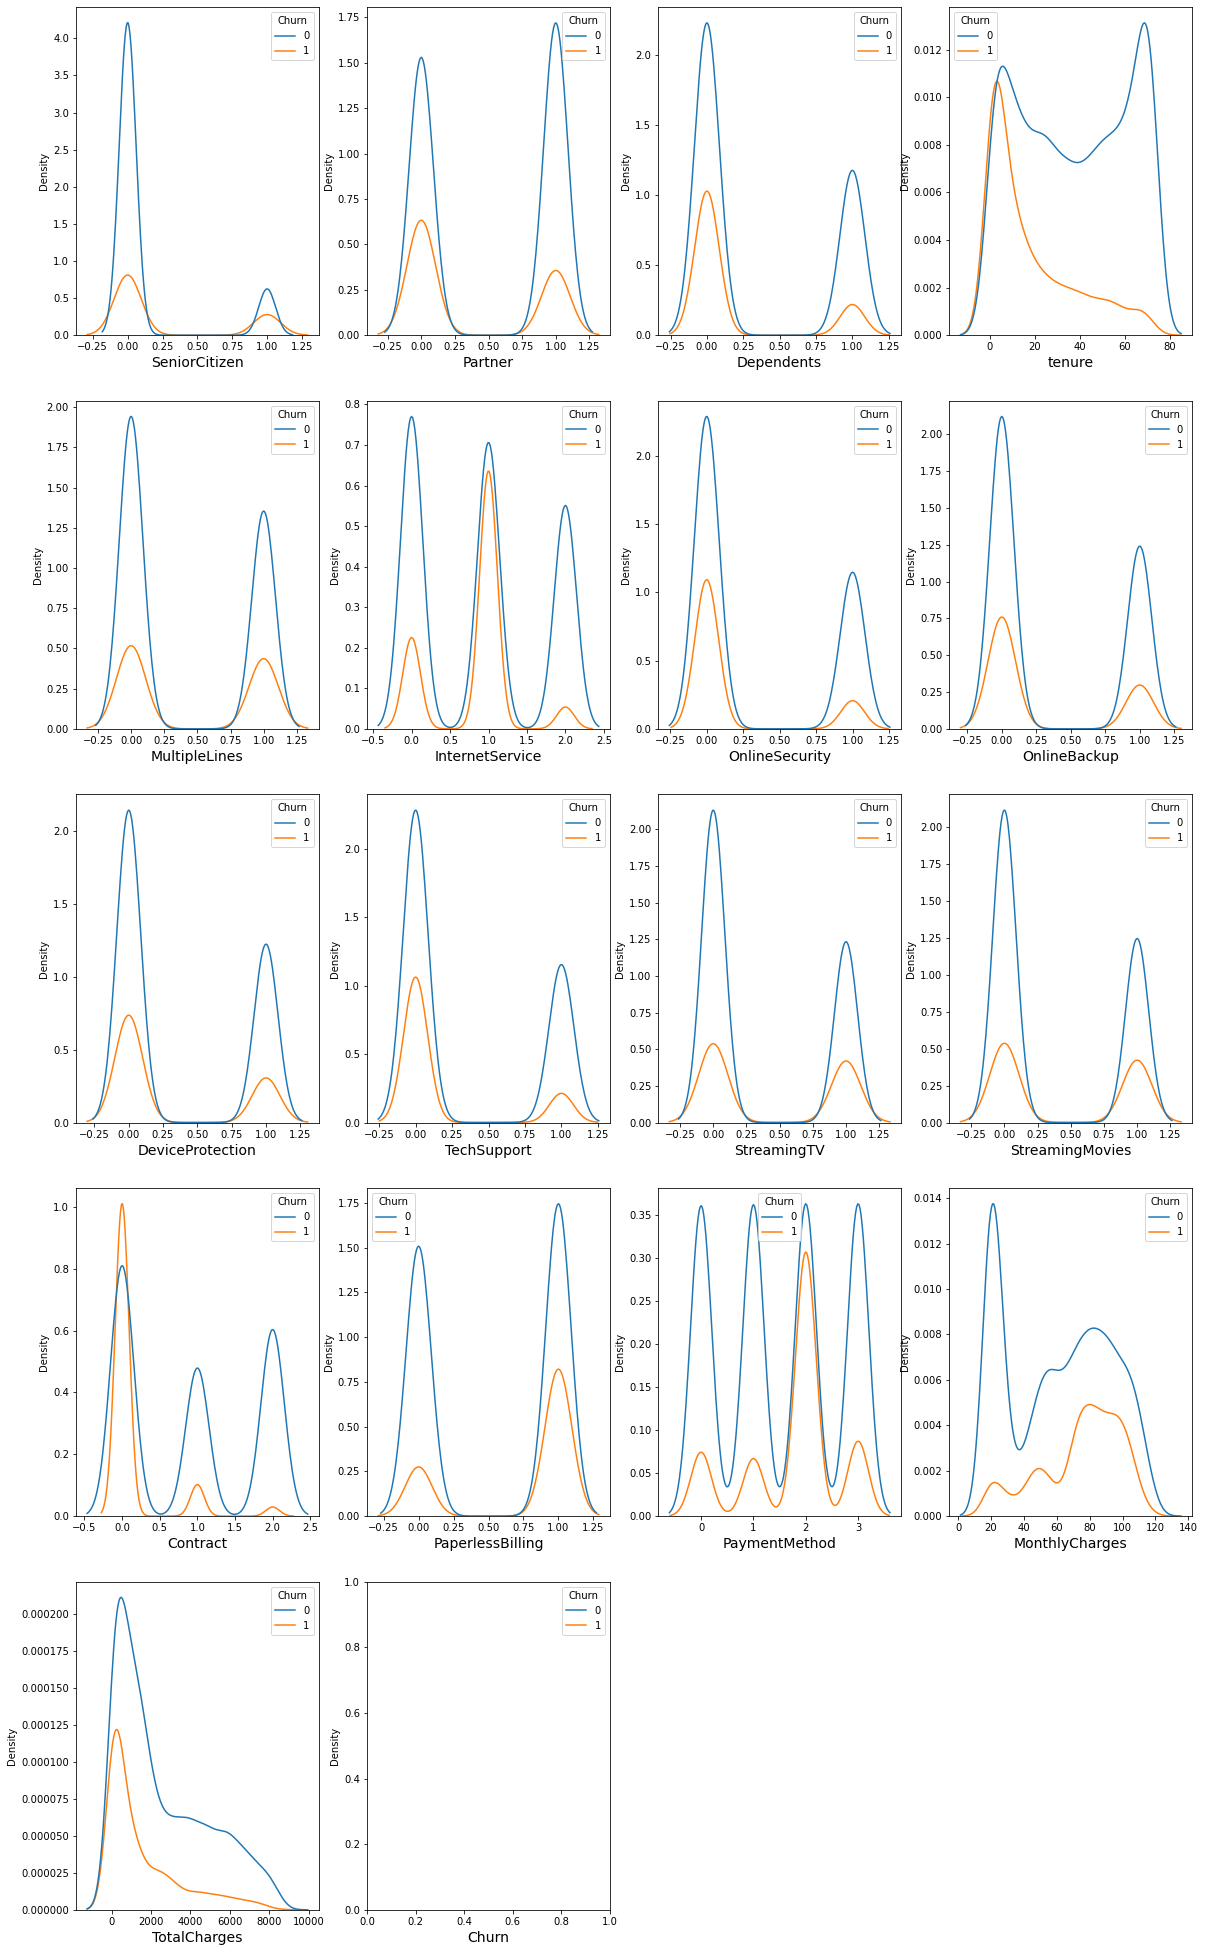

In [148]:
plt.figure(figsize=(20,35),facecolor='white')
plotnum=1
for col in df.columns:
    if plotnum<=20:
        plt.subplot(5,4,plotnum)
        sns.kdeplot(df[col], color = 'g', hue = df['Churn'])
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - There is considerable amount of skewness in all feature variables and target. we need to treat it but first of all we need to check outliers and remove that

# Checking Outliers

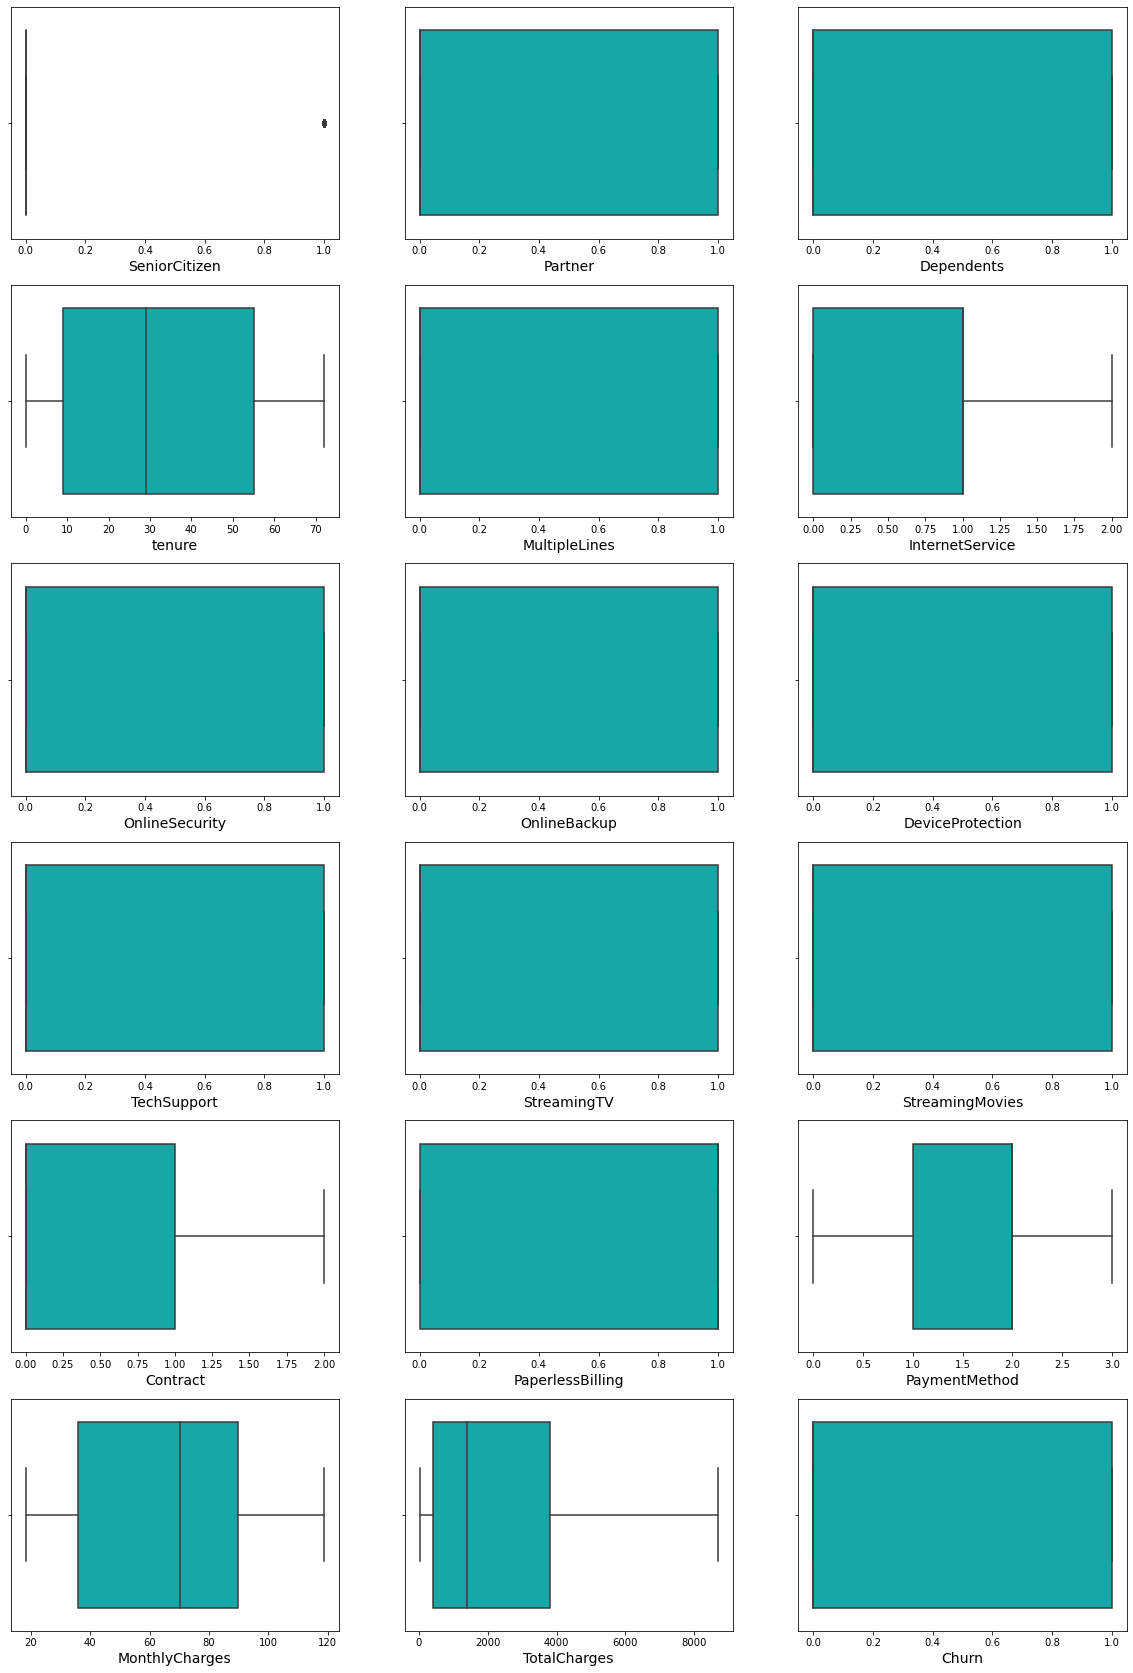

In [149]:
plt.figure(figsize=(20,35),facecolor='white')
plotnum=1
for col in df.columns:
    if plotnum<=20:
        plt.subplot(7,3,plotnum)
        sns.boxplot(df[col], color='c')
        plt.xlabel(col,fontsize=14)
    plotnum+=1
plt.show()

Observation - using Box plot only a few outliers have been detected, lets try to figure out these using zscore and remove them

# Detecting Outliers using Zscore

In [150]:
#using z-score method
from scipy.stats import zscore #import zscore from scipy library
zscore(df)

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,-0.440508,1.031400,-0.655475,-1.282728,-0.856493,-1.181531,-0.635326,1.374951,-0.725697,-0.640850,-0.792144,-0.798109,-0.830396,0.829057,0.402156,-1.164135,-0.997328,-0.599671
1,-0.440508,-0.969556,-0.655475,0.062387,-0.856493,-1.181531,1.573996,-0.727299,1.377985,-0.640850,-0.792144,-0.798109,0.368496,-1.206190,1.338965,-0.262811,-0.176347,-0.599671
2,-0.440508,-0.969556,-0.655475,-1.241967,-0.856493,-1.181531,1.573996,1.374951,-0.725697,-0.640850,-0.792144,-0.798109,-0.830396,0.829057,1.338965,-0.365914,-0.962760,1.667582
3,-0.440508,-0.969556,-0.655475,0.510759,-0.856493,-1.181531,1.573996,-0.727299,1.377985,1.560427,-0.792144,-0.798109,0.368496,-1.206190,-1.471460,-0.750058,-0.197869,-0.599671
4,-0.440508,-0.969556,-0.655475,-1.241967,-0.856493,0.175278,-0.635326,-0.727299,-0.725697,-0.640850,-0.792144,-0.798109,-0.830396,0.829057,0.402156,0.194503,-0.943556,1.667582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.440508,1.031400,1.525611,-0.345224,1.167552,-1.181531,1.573996,-0.727299,1.377985,1.560427,1.262397,1.252961,0.368496,0.829057,1.338965,0.663458,-0.131759,-0.599671
7039,-0.440508,1.031400,1.525611,1.611307,1.167552,0.175278,-0.635326,1.374951,1.377985,-0.640850,1.262397,1.252961,0.368496,0.829057,-0.534652,1.275428,2.239996,-0.599671
7040,-0.440508,1.031400,1.525611,-0.875118,-0.856493,-1.181531,1.573996,-0.727299,-0.725697,-0.640850,-0.792144,-0.798109,-0.830396,0.829057,0.402156,-1.172450,-0.857558,-0.599671
7041,2.270104,1.031400,-0.655475,-1.160445,1.167552,0.175278,-0.635326,-0.727299,-0.725697,-0.640850,-0.792144,-0.798109,-0.830396,0.829057,1.338965,0.317562,-0.875151,1.667582


In [151]:
z = np.abs(zscore(df))
z.shape

(7021, 18)

In [152]:
np.where(z>3) #detecting outliers where z>3

(array([], dtype=int64), array([], dtype=int64))

Observation - No outlier detected using Zscore method, there are no significant outliers, these can be treated using normalization technique later

# Separating Target and Feature Variables

In [154]:
X = df.drop('Churn', axis=1)
Y = df['Churn']

# Balancing Target Variable

In [155]:
Y.value_counts()

0    5164
1    1857
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

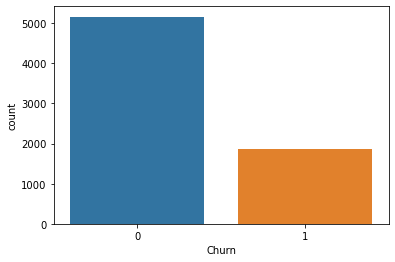

In [156]:
sns.countplot(Y)

In [158]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X,Y = smt.fit_resample(X,Y,)
X,Y

(       SeniorCitizen  Partner  Dependents  tenure  MultipleLines  \
 0                  0        1           0       1              0   
 1                  0        0           0      34              0   
 2                  0        0           0       2              0   
 3                  0        0           0      45              0   
 4                  0        0           0       2              0   
 ...              ...      ...         ...     ...            ...   
 10323              0        0           0       4              0   
 10324              0        0           0       1              0   
 10325              0        1           0      14              0   
 10326              0        1           0      60              0   
 10327              0        0           0       1              1   
 
        InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
 0                    0               0             1                 0   
 1                  

<AxesSubplot:xlabel='Churn', ylabel='count'>

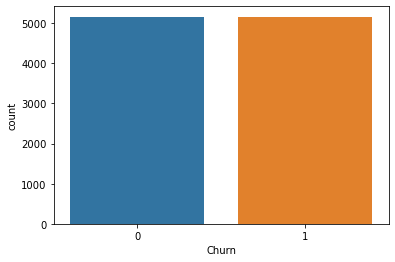

In [159]:
sns.countplot(Y)

In [160]:
X.shape

(10328, 17)

In [161]:
Y.shape

(10328,)

Observation - Target variable has been balanced using SMOTE

# Transforming data to remove skewness further (Power Transform)

In [162]:
from sklearn.preprocessing import power_transform

X = power_transform(X, method='yeo-johnson')
type(X)

numpy.ndarray

In [163]:
X.mean()

2.072025109976143e-17

In [164]:
X.std()

1.0

mean = 0 and Standard deviation = 1, our feature variable are normalized now

# Feature Scaling using Standard Scaler

In [166]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.398117,1.281184,-0.527614,-1.548161,-0.797327,-1.303263,-0.508519,1.622979,-0.618395,-0.516651,-0.749515,-0.749042,-0.691189,0.826382,0.456538,-1.328951,-1.755651
1,-0.398117,-0.780528,-0.527614,0.544821,-0.797327,-1.303263,1.966496,-0.616151,1.617090,-0.516651,-0.749515,-0.749042,1.302650,-1.210094,1.464431,-0.444060,0.396398
2,-0.398117,-0.780528,-0.527614,-1.344778,-0.797327,-1.303263,1.966496,1.622979,-0.618395,-0.516651,-0.749515,-0.749042,-0.691189,0.826382,1.464431,-0.550665,-1.274352
3,-0.398117,-0.780528,-0.527614,0.848777,-0.797327,-1.303263,1.966496,-0.616151,1.617090,1.935542,-0.749515,-0.749042,1.302650,-1.210094,-1.546779,-0.936511,0.376272
4,-0.398117,-0.780528,-0.527614,-1.344778,-0.797327,0.327602,-0.508519,-0.616151,-0.618395,-0.516651,-0.749515,-0.749042,-0.691189,0.826382,0.456538,0.042389,-1.124372


# Model Building

As this is a binary classification Problem, I will train the following models -

- A. Logistic Regression
- B. Decision Trees
- C. Random Forests
- D. SVC linear kernel
- E. SGD Classifier
- F. KNN (K_nearest_neighbors)
- G. AdaBoost Classifier
- H. Gradiant Boost Classifier
- I. Bagging Classifier

In [167]:
#importing Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,f1_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings('ignore')

# Finding best Random State

In [168]:
#Choosing the best random state for our ML Model
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20,random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    acc_train = accuracy_score(y_train,pred_train)
    acc_test = accuracy_score(y_test,pred_test)
    
    if acc_test > maxAccu:
        maxAccu = acc_test
        maxRS = i
print('test accuracy is :',maxAccu,'at random_state:',maxRS)

test accuracy is : 0.8247821878025169 at random_state: 136


# Creating the Training and Testing data set

In [169]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=maxRS, test_size=0.20, stratify = Y)

#creating models empty dataframe
models_df = pd.DataFrame()

# Machine Learning Model

In [170]:
def reg_func(model, X, Y, model_name,sc):    
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    
    #classification report
    print('Classification Report :\n',classification_report(y_test,pred))
    
    #confusion matrix
    conf = confusion_matrix(y_test, pred)
    tp = conf[0,0]
    fp = conf[0,1]
    tn = conf[1,1]
    fn = conf[1,0]
    sns.heatmap(conf, annot=True)
    
    #accracy score
    acs = accuracy_score(y_test,pred)
    print('Accuracy :',acs)
    
    #cross validation score
    cvs = cross_val_score(model,X,Y,cv=KFold(n_splits=10, shuffle = True)).mean()
    print('Cross validation score :',cvs)
    
    #difference in accuracy and cross validation score
    diff = abs(acs - cvs)
    print('Accuracy and CV Score Diff :', diff)
    
    #ROC Score
    rocs = roc_auc_score(y_test,pred)
    print("ROC AUC Score :", rocs)
    
    #ROC AUC curve
    fpr,tpr,threshold = roc_curve(y_test, model.predict(x_test))
    plt.figure(figsize=(5,5),facecolor='white')    
    plt.plot(fpr,tpr,label=model_name)
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("Receiver Operating Characteristic")
    plt.show()
    
    #appending data to dataframe
    models_df[sc] = [model_name, acs, cvs, diff, tp, fp, fn, tn, rocs,fpr,tpr]
        
    plt.figure(figsize=(5,5))
    plt.scatter(x=y_test, y=pred, color='r')
    plt.plot(y_test,y_test, color='b')
    plt.xlabel('Actual', fontsize = 14)
    plt.ylabel('Predicted', fontsize = 14)
    plt.show()

# A) Logistic Regression

Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.77      0.79      1033
           1       0.78      0.81      0.79      1033

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066

Accuracy : 0.7904162633107454
Cross validation score : 0.8075119881131947
Accuracy and CV Score Diff : 0.017095724802449253
ROC AUC Score : 0.7904162633107454


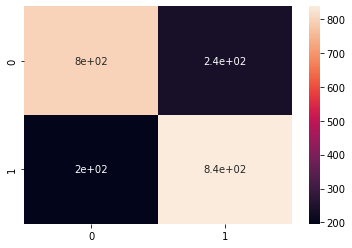

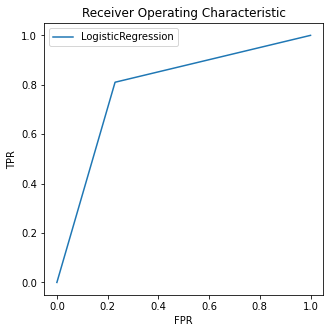

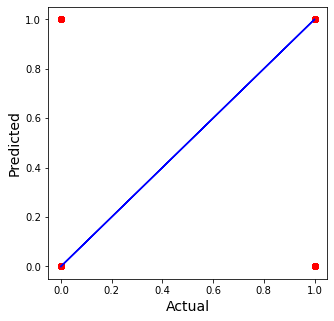

In [171]:
reg_func(LogisticRegression(),X,Y, 'LogisticRegression','lr')

# B) Decision Tree Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.75      0.76      1033
           1       0.76      0.78      0.77      1033

    accuracy                           0.76      2066
   macro avg       0.76      0.76      0.76      2066
weighted avg       0.76      0.76      0.76      2066

Accuracy : 0.7637947725072604
Cross validation score : 0.7914396617063268
Accuracy and CV Score Diff : 0.02764488919906649
ROC AUC Score : 0.7637947725072605


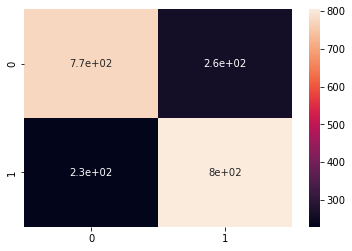

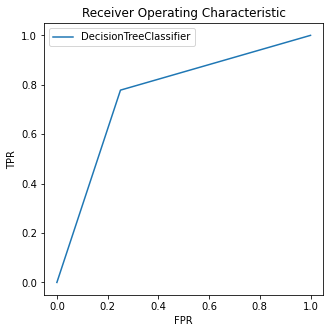

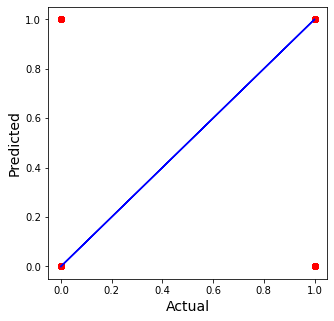

In [172]:
from sklearn.tree import DecisionTreeClassifier
reg_func(DecisionTreeClassifier(), X, Y, 'DecisionTreeClassifier','dtc')

# C) Random Forests Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1033
           1       0.82      0.83      0.83      1033

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066

Accuracy : 0.8281703775411423
Cross validation score : 0.8398545667394582
Accuracy and CV Score Diff : 0.01168418919831593
ROC AUC Score : 0.8281703775411423


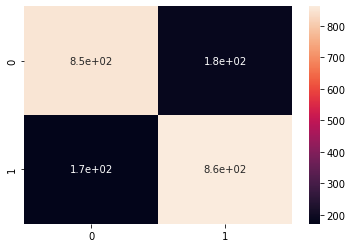

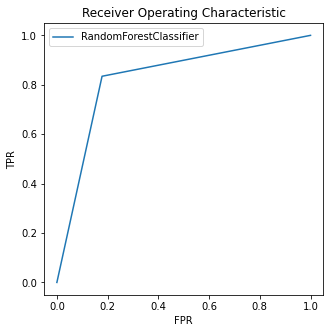

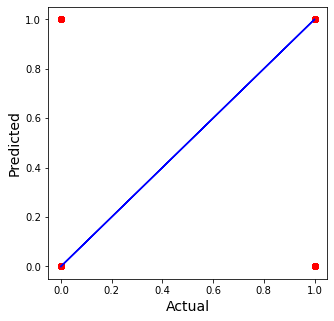

In [173]:
from sklearn.ensemble import RandomForestClassifier
reg_func(RandomForestClassifier(), X, Y,'RandomForestClassifier','rfc')

# D) SVM Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      1033
           1       0.80      0.81      0.80      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066

Accuracy : 0.8005808325266215
Cross validation score : 0.8150634675851925
Accuracy and CV Score Diff : 0.014482635058571058
ROC AUC Score : 0.8005808325266215


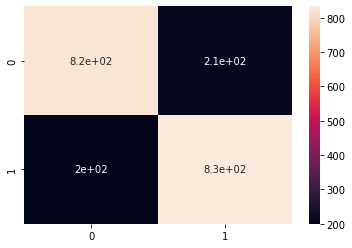

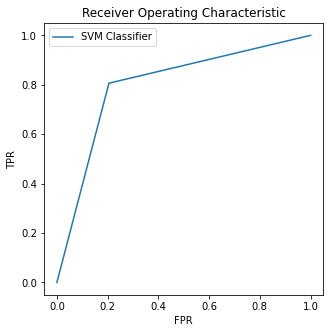

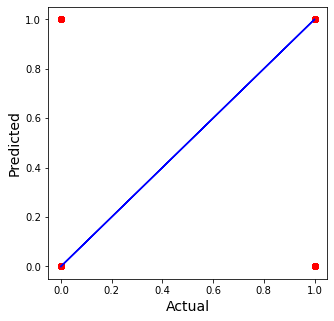

In [174]:
from sklearn.svm import SVC
reg_func(SVC(),X,Y,'SVM Classifier','svmc')

# E) SGD Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.77      0.78      1033
           1       0.78      0.80      0.79      1033

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066

Accuracy : 0.7855759922555663
Cross validation score : 0.7986982860187457
Accuracy and CV Score Diff : 0.013122293763179416
ROC AUC Score : 0.7855759922555664


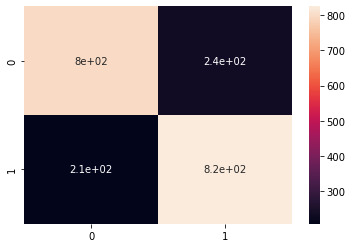

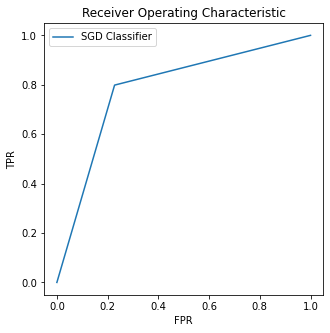

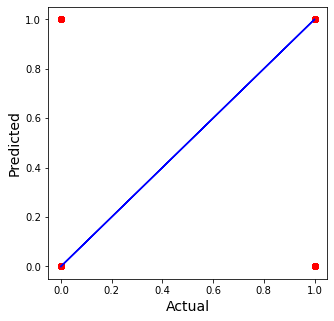

In [175]:
from sklearn.linear_model import SGDClassifier
reg_func(SGDClassifier(),X,Y,'SGD Classifier','sgdc')

# F) KNN (k Nearest Neighbour)

Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.76      0.78      1033
           1       0.77      0.82      0.80      1033

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066

Accuracy : 0.7909002904162633
Cross validation score : 0.7947320778645774
Accuracy and CV Score Diff : 0.003831787448314139
ROC AUC Score : 0.7909002904162633


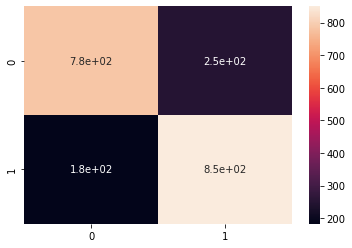

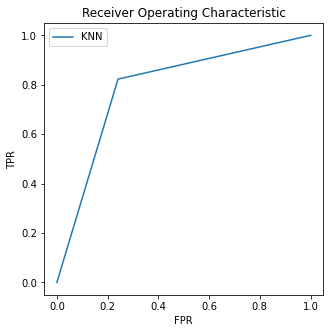

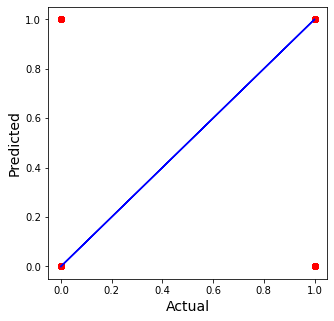

In [176]:
from sklearn.neighbors import KNeighborsClassifier
reg_func(KNeighborsClassifier(),X,Y,'KNN','knn')

# G) ADA Boost Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.74      0.79      1033
           1       0.77      0.86      0.81      1033

    accuracy                           0.80      2066
   macro avg       0.81      0.80      0.80      2066
weighted avg       0.81      0.80      0.80      2066

Accuracy : 0.8025169409486931
Cross validation score : 0.8176779643846104
Accuracy and CV Score Diff : 0.015161023435917298
ROC AUC Score : 0.8025169409486932


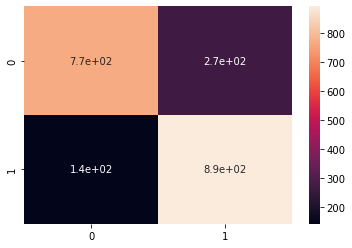

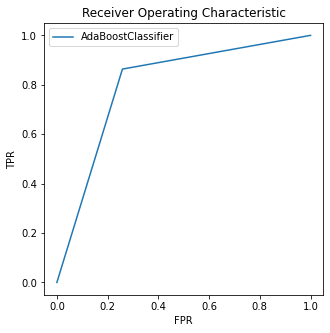

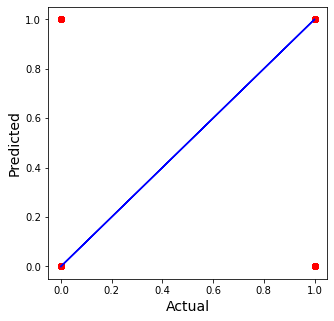

In [177]:
from sklearn.ensemble import AdaBoostClassifier
reg_func(AdaBoostClassifier(), X,Y,'AdaBoostClassifier','abc')

# H) Gradient Boost Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      1033
           1       0.79      0.85      0.82      1033

    accuracy                           0.81      2066
   macro avg       0.82      0.81      0.81      2066
weighted avg       0.82      0.81      0.81      2066

Accuracy : 0.814133591481123
Cross validation score : 0.8236805571189507
Accuracy and CV Score Diff : 0.009546965637827753
ROC AUC Score : 0.8141335914811231


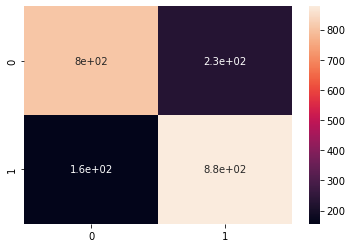

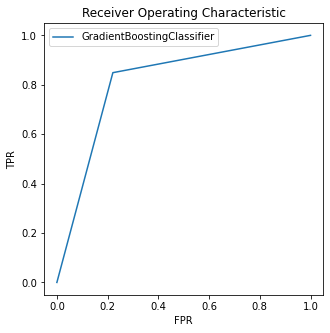

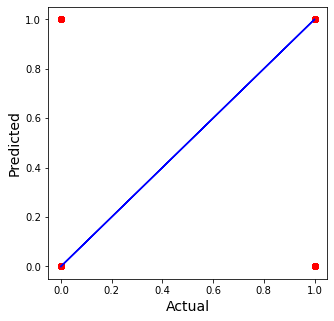

In [178]:
from sklearn.ensemble import GradientBoostingClassifier
reg_func(GradientBoostingClassifier(),X,Y,'GradientBoostingClassifier','gbc')

# I) Bagging Classifier

Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1033
           1       0.83      0.80      0.82      1033

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066

Accuracy : 0.81945788964182
Cross validation score : 0.8280413974500401
Accuracy and CV Score Diff : 0.008583507808220148
ROC AUC Score : 0.8194578896418199


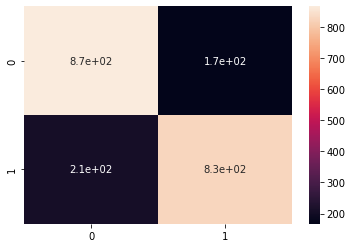

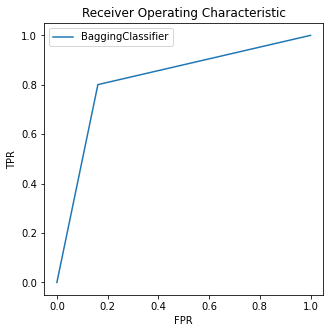

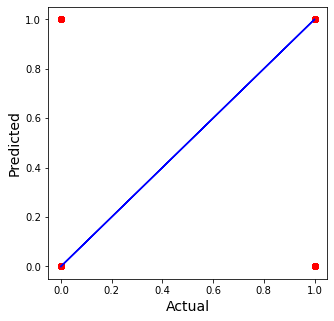

In [179]:
from sklearn.ensemble import BaggingClassifier

reg_func(BaggingClassifier(),X,Y,'BaggingClassifier','bc')

# Analysing Scores

In [180]:
model_stats = models_df.transpose()
model_stats

,0,1,2,3,4,5,6,7,8,9,10
lr,LogisticRegression,0.790416,0.807512,0.017096,796,237,196,837,0.790416,"[0.0, 0.22942884801548888, 1.0]","[0.0, 0.8102613746369797, 1.0]"
dtc,DecisionTreeClassifier,0.763795,0.79144,0.027645,774,259,229,804,0.763795,"[0.0, 0.25072604065827686, 1.0]","[0.0, 0.7783155856727977, 1.0]"
rfc,RandomForestClassifier,0.82817,0.839855,0.011684,849,184,171,862,0.82817,"[0.0, 0.1781219748305905, 1.0]","[0.0, 0.8344627299128751, 1.0]"
svmc,SVM Classifier,0.800581,0.815063,0.014483,821,212,200,833,0.800581,"[0.0, 0.20522749273959343, 1.0]","[0.0, 0.8063891577928364, 1.0]"
sgdc,SGD Classifier,0.785576,0.798698,0.013122,798,235,208,825,0.785576,"[0.0, 0.22749273959341723, 1.0]","[0.0, 0.7986447241045499, 1.0]"
knn,KNN,0.7909,0.794732,0.003832,784,249,183,850,0.7909,"[0.0, 0.24104549854791868, 1.0]","[0.0, 0.8228460793804453, 1.0]"
abc,AdaBoostClassifier,0.802517,0.817678,0.015161,766,267,141,892,0.802517,"[0.0, 0.2584704743465634, 1.0]","[0.0, 0.8635043562439496, 1.0]"
gbc,GradientBoostingClassifier,0.814134,0.823681,0.009547,805,228,156,877,0.814134,"[0.0, 0.2207163601161665, 1.0]","[0.0, 0.8489835430784124, 1.0]"
bc,BaggingClassifier,0.819458,0.828041,0.008584,866,167,206,827,0.819458,"[0.0, 0.1616650532429816, 1.0]","[0.0, 0.8005808325266215, 1.0]"


In [181]:
model_stats.columns = ['Model','Accuracy Score', 'Cross Validation Score', 'Difference','True +ve', 'False +ve', 'False -ve', 'True -ve','ROC Score','FPR','TPR']
model_stats

,Model,Accuracy Score,Cross Validation Score,Difference,True +ve,False +ve,False -ve,True -ve,ROC Score,FPR,TPR
lr,LogisticRegression,0.790416,0.807512,0.017096,796,237,196,837,0.790416,"[0.0, 0.22942884801548888, 1.0]","[0.0, 0.8102613746369797, 1.0]"
dtc,DecisionTreeClassifier,0.763795,0.79144,0.027645,774,259,229,804,0.763795,"[0.0, 0.25072604065827686, 1.0]","[0.0, 0.7783155856727977, 1.0]"
rfc,RandomForestClassifier,0.82817,0.839855,0.011684,849,184,171,862,0.82817,"[0.0, 0.1781219748305905, 1.0]","[0.0, 0.8344627299128751, 1.0]"
svmc,SVM Classifier,0.800581,0.815063,0.014483,821,212,200,833,0.800581,"[0.0, 0.20522749273959343, 1.0]","[0.0, 0.8063891577928364, 1.0]"
sgdc,SGD Classifier,0.785576,0.798698,0.013122,798,235,208,825,0.785576,"[0.0, 0.22749273959341723, 1.0]","[0.0, 0.7986447241045499, 1.0]"
knn,KNN,0.7909,0.794732,0.003832,784,249,183,850,0.7909,"[0.0, 0.24104549854791868, 1.0]","[0.0, 0.8228460793804453, 1.0]"
abc,AdaBoostClassifier,0.802517,0.817678,0.015161,766,267,141,892,0.802517,"[0.0, 0.2584704743465634, 1.0]","[0.0, 0.8635043562439496, 1.0]"
gbc,GradientBoostingClassifier,0.814134,0.823681,0.009547,805,228,156,877,0.814134,"[0.0, 0.2207163601161665, 1.0]","[0.0, 0.8489835430784124, 1.0]"
bc,BaggingClassifier,0.819458,0.828041,0.008584,866,167,206,827,0.819458,"[0.0, 0.1616650532429816, 1.0]","[0.0, 0.8005808325266215, 1.0]"


# ROC AUC CURVE for all the Model

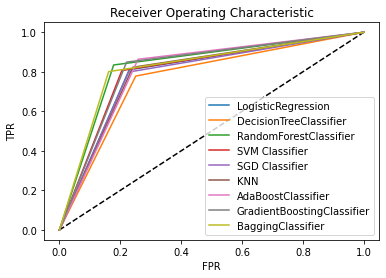

In [182]:
plt.plot([0,1],[0,1], 'k--')
for i in range(0,model_stats.shape[0]):
    plt.plot(model_stats['FPR'][i], model_stats['TPR'][i], label=model_stats['Model'][i])
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver Operating Characteristic")
plt.show()

# Visualizing Accuracy Score for all Models

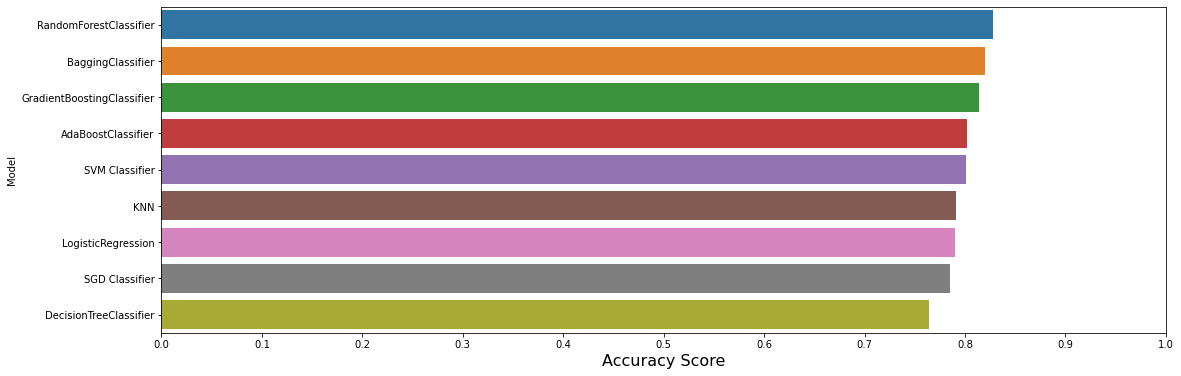

In [183]:
f, axe = plt.subplots(1,1, figsize=(18,6))

model_stats.sort_values(by=['Accuracy Score'], ascending=False, inplace=True)

sns.barplot(x='Accuracy Score', y='Model', data = model_stats, ax = axe)
axe.set_xlabel('Accuracy Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

Observation - Random Forest Classifier is giving the highest Accuracy score 82.81%

# Visualizing Cross Validation Score for all Models

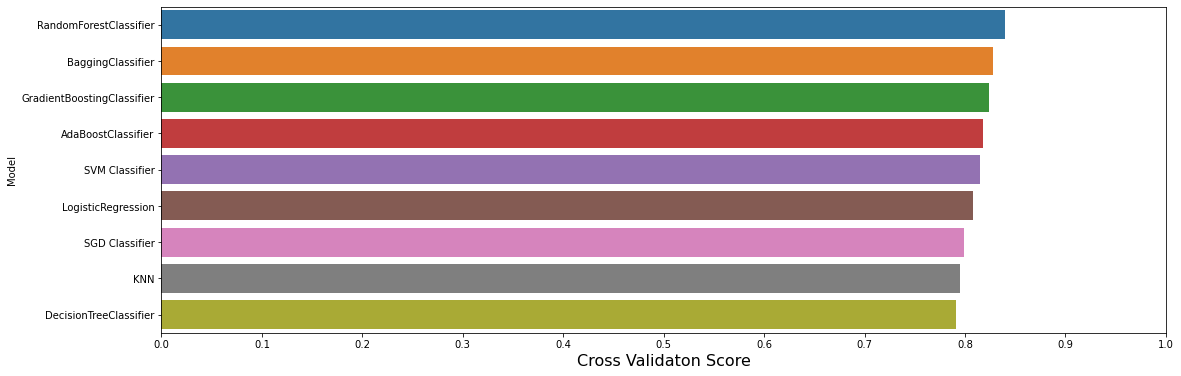

In [184]:
f, axe = plt.subplots(1,1, figsize=(18,6))

model_stats.sort_values(by=['Cross Validation Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validation Score', y='Model', data = model_stats, ax = axe)
axe.set_xlabel('Cross Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

Observation - Random Forest Classifier is giving the highest Cross validation Score 83.98%

# Visualizing False Predictions for all Models

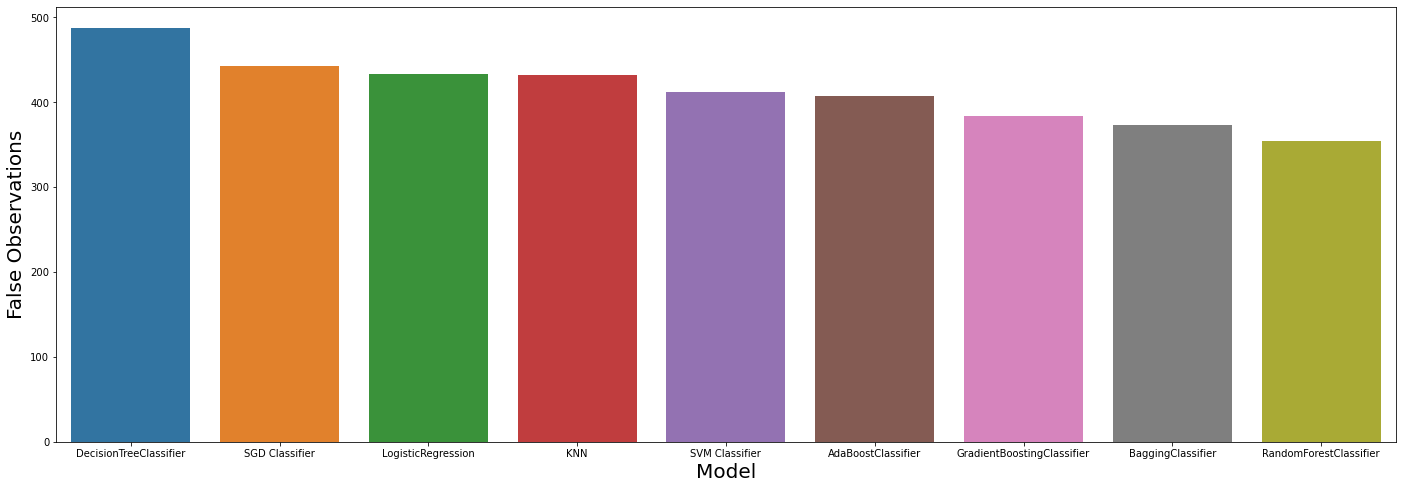

In [185]:
model_stats.sort_values(by=(['Accuracy Score']), ascending=True, inplace=True)

f, axe = plt.subplots(1,1, figsize=(24,8))
sns.barplot(x = model_stats['Model'], y=model_stats['False +ve'] + model_stats['False -ve'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('False Observations', size=20)

plt.show()

Observation - Random Forest Classifier is giving the least false predictions

Hence, Random Forest Classifier can be choosen as the best model for this binary classification problem

# Hyper Parameter Tuning with Random Forest Classifier

In [186]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy','log_loss'],"max_depth":['auto',2,4,6,8,10],'n_estimators':[100,150,200,250,300]}
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=KFold(n_splits=10, shuffle = True),scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}

Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.79      0.81      1033
           1       0.80      0.85      0.82      1033

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066

Accuracy : 0.818973862536302
Cross validation score : 0.8334628762466512
Accuracy and CV Score Diff : 0.014489013710349163
ROC AUC Score : 0.8189738625363021


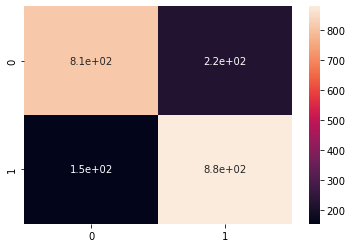

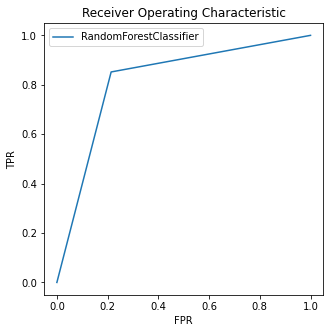

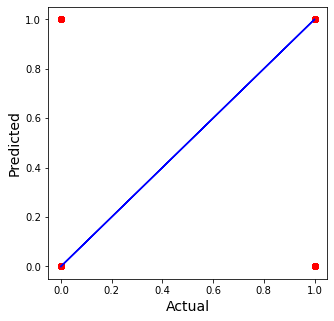

In [188]:
GCV.best_estimator_
rfc = RandomForestClassifier(criterion = 'gini', max_depth = 10, n_estimators = 200) 
reg_func(rfc, X, Y,'RandomForestClassifier','rfc')

# Saving the Model

In [189]:
import pickle
filename = 'telecom_customer_churn.pkl'
pickle.dump(rfc,open(filename,'wb'))

# Conclusion

In [190]:
loaded_model = pickle.load(open('telecom_customer_churn.pkl','rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

81.8973862536302


In [191]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065
Predicted,0,1,1,1,0,1,0,0,1,1,...,0,0,0,0,0,1,0,1,0,0
Original,0,1,1,1,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0


# This model is 81.89% Accurate